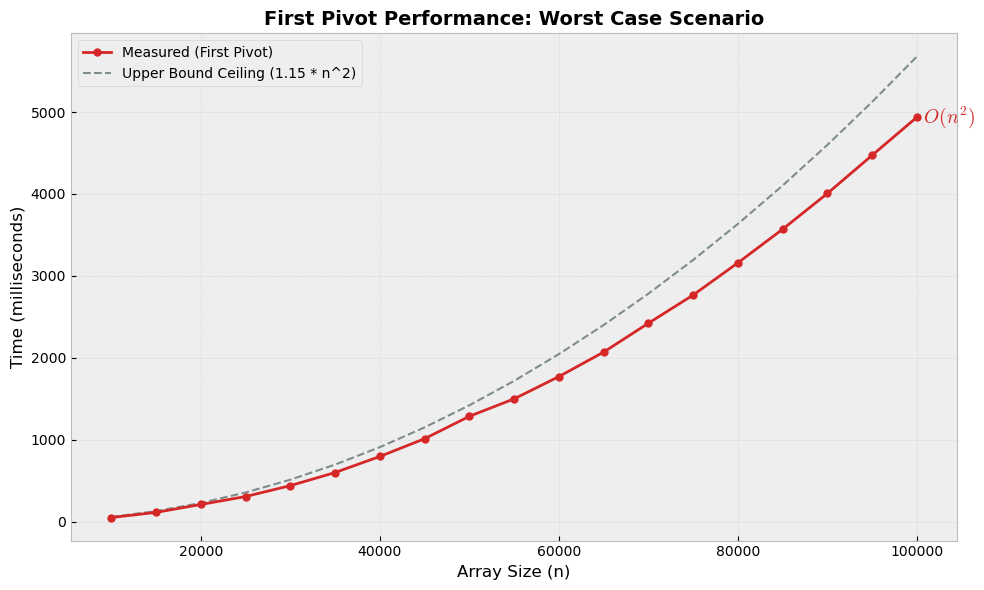

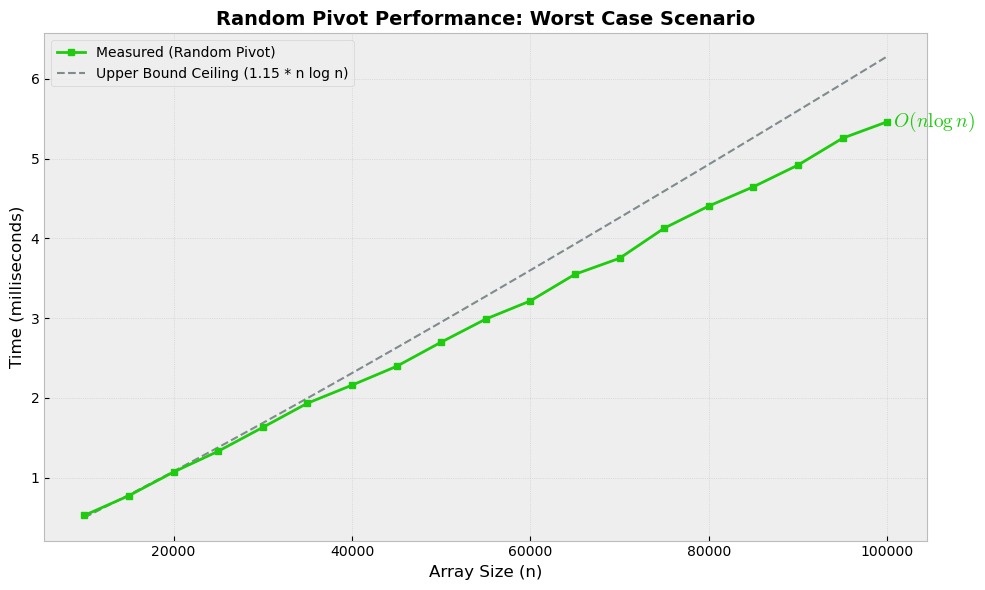

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_quicksort_results():
    try:
        df = pd.read_csv("quicksort_worst_case.csv")
    except FileNotFoundError:
        print("Error: 'quicksort_worst_case.csv' not found.")
        return

    sizes = df["Size"].values
    first_pivot = df["FirstPivot_ms"].values
    random_pivot = df["RandomPivot_ms"].values

    # Offset for theoretical bounds
    OFFSET = 1.15

    # --- Calculation of Theoretical Upper Bounds ---
    c1 = (first_pivot[-1] / (sizes[-1]**2)) * OFFSET 
    bound_n2 = c1 * (sizes**2)
    
    c2 = (random_pivot[-1] / (sizes[-1] * np.log2(sizes[-1]))) * OFFSET
    bound_nlogn = c2 * (sizes * np.log2(sizes))

    plt.style.use("bmh")

    # --- Graph 1: First Pivot (O(N^2)) ---
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, first_pivot, color="#d62728", marker='o', markersize=5, 
             linewidth=2, label="Measured (First Pivot)", zorder=3)
    plt.plot(sizes, bound_n2, color="#7f8c8d", linestyle="--", linewidth=1.5,
             label=f"Upper Bound Ceiling ({OFFSET} * n^2)", zorder=2)
    
    # Complexity label next to curve
    plt.text(sizes[-1], first_pivot[-1], r' $O(n^2)$', color="#d62728", 
             fontsize=14, fontweight='bold', va='center')

    plt.title("First Pivot Performance: Worst Case Scenario", fontsize=14, fontweight='bold')
    plt.xlabel("Array Size (n)")
    plt.ylabel("Time (milliseconds)")
    plt.legend()
    plt.grid(True, linestyle=":", alpha=0.6)
    plt.tight_layout()

    # --- Graph 2: Random Pivot (O(N log N)) ---
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, random_pivot, color="#1ecb0e", marker='s', markersize=5, 
             linewidth=2, label="Measured (Random Pivot)", zorder=3)
    plt.plot(sizes, bound_nlogn, color="#7f8c8d", linestyle="--", linewidth=1.5,
             label=f"Upper Bound Ceiling ({OFFSET} * n log n)", zorder=2)
    
    # Complexity label next to curve
    plt.text(sizes[-1], random_pivot[-1], r' $O(n \log n)$', color="#1ecb0e", 
             fontsize=14, fontweight='bold', va='center')

    plt.title("Random Pivot Performance: Worst Case Scenario", fontsize=14, fontweight='bold')
    plt.xlabel("Array Size (n)")
    plt.ylabel("Time (milliseconds)")
    plt.legend()
    plt.grid(True, linestyle=":", alpha=0.6)
    plt.tight_layout()

    # Show both windows
    plt.show()

if __name__ == "__main__":
    plot_quicksort_results()